# Splane tutorial: Identification of uniform spatial domain in multiple slices

September 2022

Dataset: 11 Visium slices of human breast cancer ([here](#)).

In [9]:
from SPACEL.setting import set_environ_seed
set_environ_seed(42)
from SPACEL import Splane

import scanpy as sc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=100,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))

Setting environment seed: 42


## Spatial transcriptomic data import

The input data type of Splane is a list of anndata objects for each slice from Spoint. If users use cell type composition from other deconvoluiton methods, the anndata objects of each slice must contain cell type composition in `.obs` and cell types name in `.uns['celltypes']`

In [3]:
st_1142243F_ad = sc.read_h5ad('../data/breast_cancer/bc_spatial_1142243F.h5ad')
st_1160920F_ad = sc.read_h5ad('../data/breast_cancer/bc_spatial_1160920F.h5ad')
st_CID4290_ad = sc.read_h5ad('../data/breast_cancer/bc_spatial_CID4290.h5ad')
st_CID4465_ad = sc.read_h5ad('../data/breast_cancer/bc_spatial_CID4465.h5ad')
st_CID44971_ad = sc.read_h5ad('../data/breast_cancer/bc_spatial_CID44971.h5ad')
st_CID4535_ad = sc.read_h5ad('../data/breast_cancer/bc_spatial_CID4535.h5ad')
Parent_Visium_Human_BreastCancer = sc.read_h5ad('../data/breast_cancer/bc_spatial_Parent_Visium_Human_BreastCancer.h5ad')
V1_Breast_Cancer_Block_A_Section_1 = sc.read_h5ad('../data/breast_cancer/bc_spatial_V1_Breast_Cancer_Block_A_Section_1.h5ad')
V1_Breast_Cancer_Block_A_Section_2 = sc.read_h5ad('../data/breast_cancer/bc_spatial_V1_Breast_Cancer_Block_A_Section_2.h5ad')
V1_Human_Invasive_Ductal_Carcinoma = sc.read_h5ad('../data/breast_cancer/bc_spatial_V1_Human_Invasive_Ductal_Carcinoma.h5ad')
Visium_FFPE_Human_Breast_Cancer = sc.read_h5ad('../data/breast_cancer/bc_spatial_Visium_FFPE_Human_Breast_Cancer.h5ad')

In [4]:
st_ad_list = [
    st_1142243F_ad,
    st_1160920F_ad,
    st_CID4290_ad,
    st_CID4465_ad,
    st_CID44971_ad,
    st_CID4535_ad,
    Parent_Visium_Human_BreastCancer,
    V1_Breast_Cancer_Block_A_Section_1,
    V1_Breast_Cancer_Block_A_Section_2,
    V1_Human_Invasive_Ductal_Carcinoma,
    Visium_FFPE_Human_Breast_Cancer
]

## Training Splane model

In this step, we initialize Splane model with a anndata object list as input. The parameter `n_clusters` controls the number of spatial domains.

In [5]:
Splane = Splane.init_model(st_ad_list, n_clusters=10)

Setting global seed: 42
Calculating cell type weights...


/home/qukun/xuhao/workspace/CellEagle/SPACEL/SPACEL/Splane/utils.py:43: RuntimeWarning: invalid value encountered in double_scalars
  return len(x) / W * inum / z2ss


Generating GNN inputs...


2022-09-17 09:37:50.762777: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/gridview//pbs/dispatcher/lib::/usr/local/lib64:/usr/local/lib
2022-09-17 09:37:50.807070: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-17 09:37:50.811761: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wks1): /proc/driver/nvidia/version does not exist
2022-09-17 09:37:51.091068: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-17 09:37:51.770619: I tens

Using Chebyshev polynomial basis filters...
Calculating largest eigenvalue of normalized graph Laplacian...


/home/qukun/xuhao/workspace/CellEagle/SPACEL/SPACEL/Splane/kegra/gnn_utils.py:45: RuntimeWarning: divide by zero encountered in power
  d = sp.diags(np.power(np.array(adj.sum(1)), -1).flatten(), 0)


Calculating Chebyshev polynomials up to order 2...


Here, we train the model to obtain latent feature of each spots/cells. The parameter `d_l` affects the level of batch effect correction between slices. By default, `d_l` is `0.2`.

In [6]:
Splane.train(d_l=0.2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

### Update best model
Epoch 0 train g loss=-3.301483631134033 g loss=-2.826140880584717 d loss=2.3767142295837402 acc=0.058828577399253845 simi loss=-0.8983196020126343 db loss=1.8683396217745323
### Update best model
Epoch 5 train g loss=-3.592109441757202 g loss=-3.1205475330352783 d loss=2.3578100204467773 acc=0.13547445833683014 simi loss=-0.971418559551239 db loss=1.6789155217901588
### Update best model
Epoch 10 train g loss=-3.6974117755889893 g loss=-3.2279341220855713 d loss=2.3473877906799316 

Then, we can identify the spatial domain to which each spot/cell belongs. By default, the results will be saved in `spatial_domain` column in `.obs`. If the `key` parameter is provided, the results will be saved in `.obs[key]`.

In [7]:
Splane.identify_spatial_domain()

## Plot spatial domain results

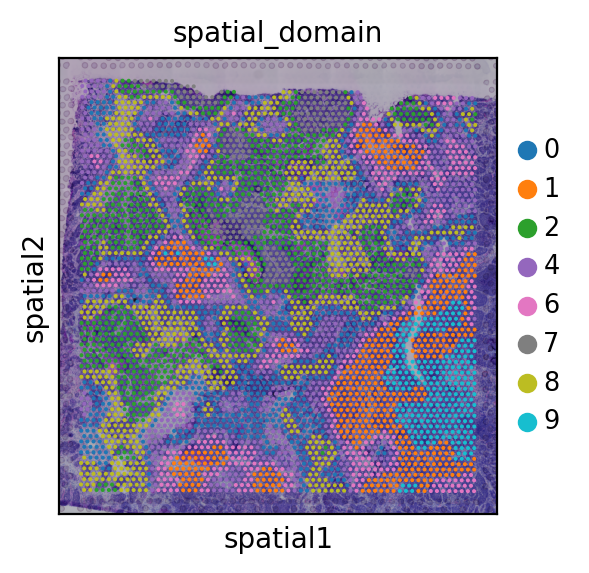

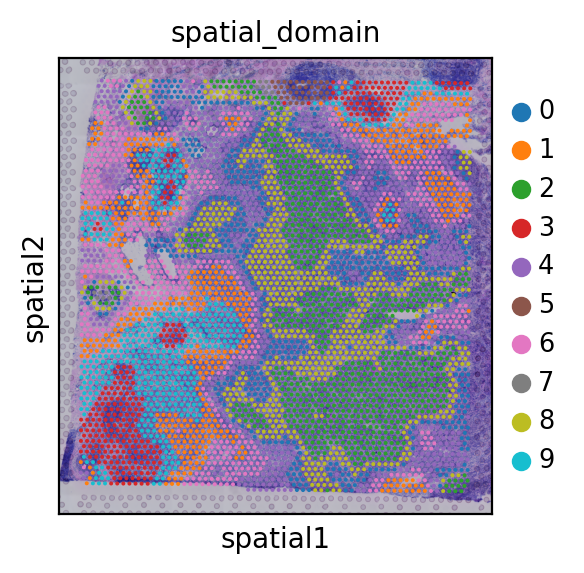

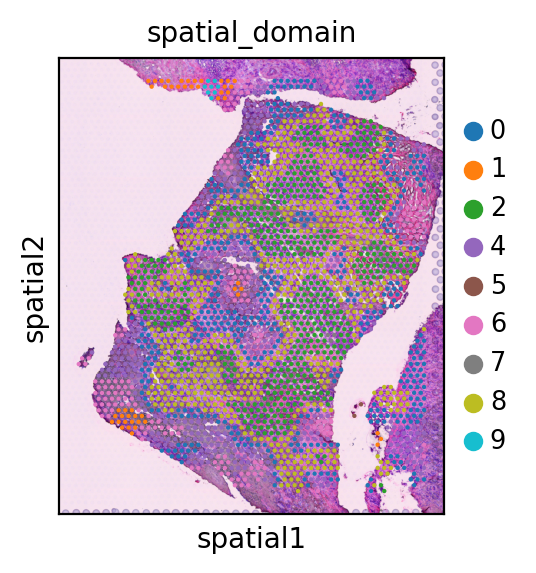

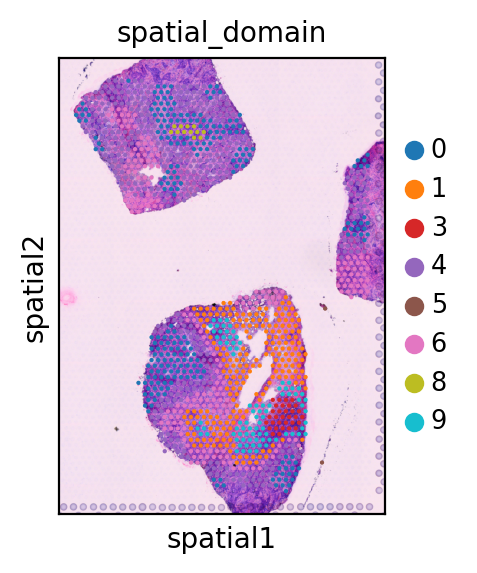

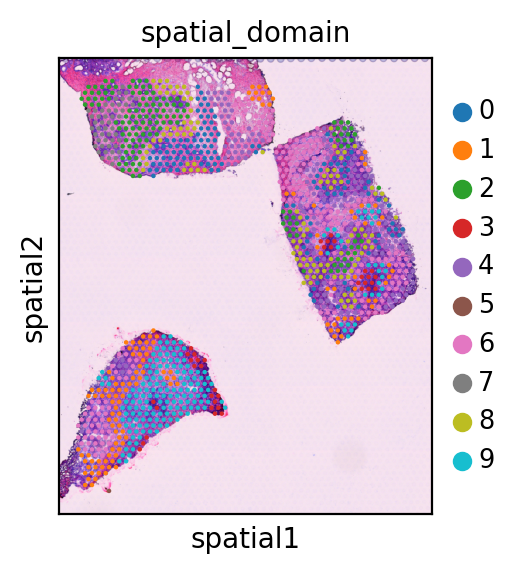

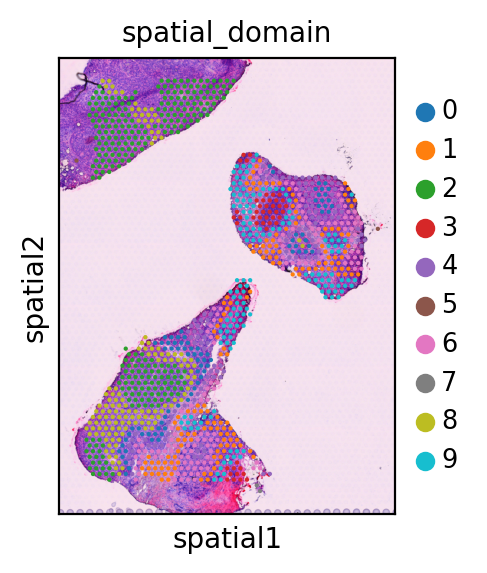

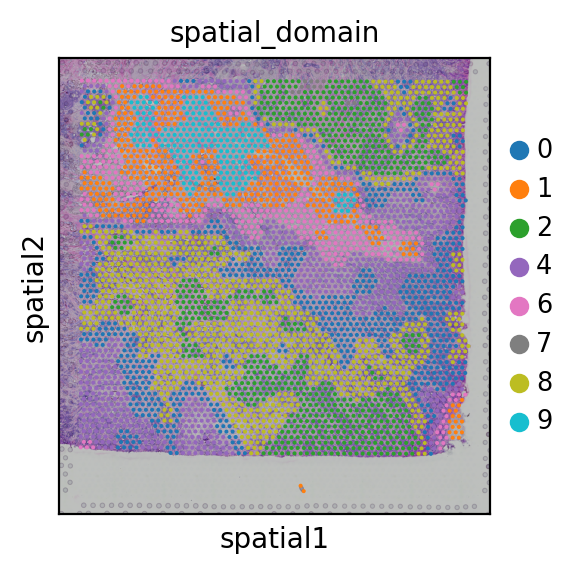

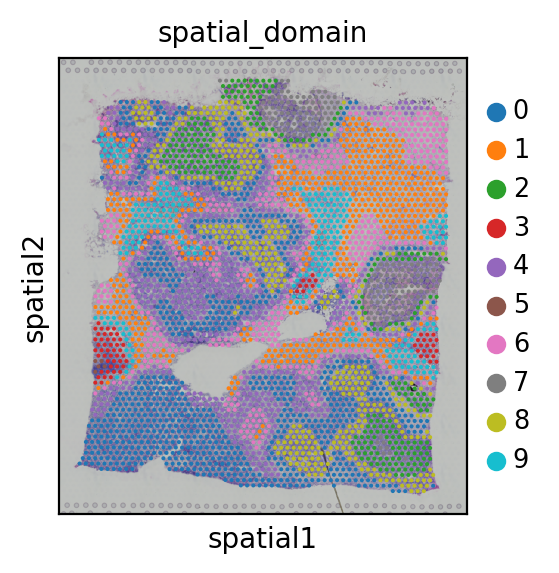

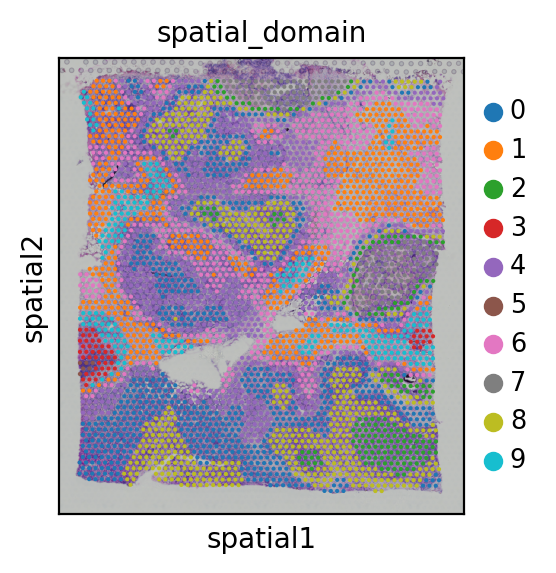

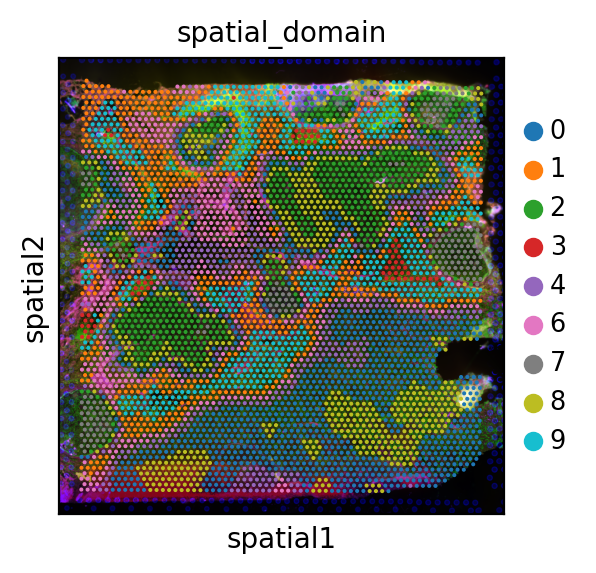

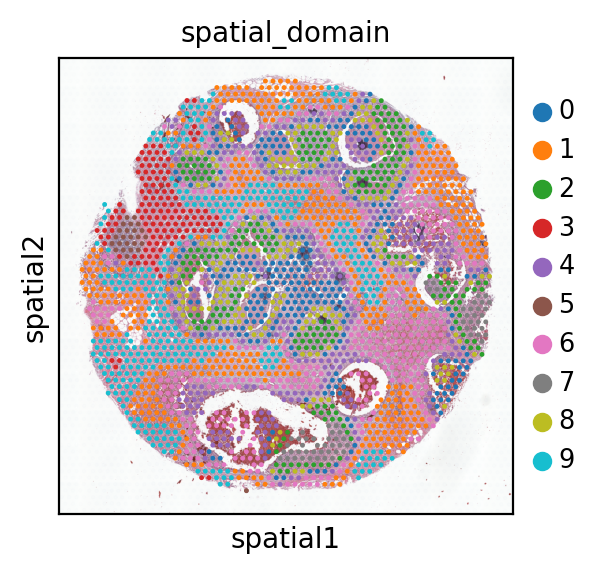

In [10]:
for ad in st_ad_list:
    sc.pl.spatial(ad,color='spatial_domain')